In [80]:
import sys
import json
import pandas as pd
import numpy as np

stock = np.empty([0,5])

for single_date in pd.date_range(end='2020-08-26', periods=1000, freq='B', closed='left'):
    try: 
        data =  json.load(open(f'/home/mlb/res/stock/twse/json/{single_date.strftime("%Y-%m-%d")}.json'))
        day_data = []
        for key in data['2330']:
            day_data.append(eval(data['2330'][key]))
        day_data = np.array(day_data)
#         print(data['2330']['close', 'high', 'low', 'open', 'volumn'])
        stock = np.vstack((stock, day_data[1:]))
    except:
        continue               

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# print(stock)
                               
feature = stock[:,1:]
target = stock[:,:1]

In [81]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train ,target_test = train_test_split(feature,target,test_size=0.05)
pridectedDays = int(math.ceil(0.05 * len(data)))
lrTool = LinearRegression()
lrTool.fit(feature_train,target_train)
predictByTest = lrTool.predict(feature_test)
# print(predictByTest, target_test)

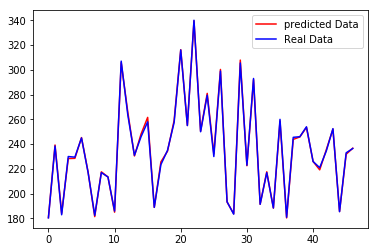

In [56]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(predictByTest, color="red",label='predicted Data')
plt.plot(target_test, color="blue",label='Real Data')
plt.legend(loc='best')
plt.show()

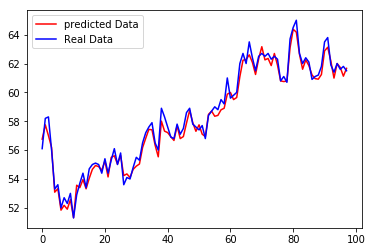

In [90]:
test2 = np.empty([0,5])
for single_date in pd.date_range(end='2009-10-26', periods=100, freq='B', closed='left'):
    try: 
        data =  json.load(open(f'/home/mlb/res/stock/twse/json/{single_date.strftime("%Y-%m-%d")}.json'))
        day_data = []
        for key in data['2330']:
            day_data.append(eval(data['2330'][key]))
        day_data = np.array(day_data)
#         print(data['2330'])
        test2 = np.vstack((test2, day_data[1:]))
    except:
        continue
test2_feature = test2[:,1:]
test2_target = test2[:,:1]
predictByTest2 = lrTool.predict(test2_feature)
                               
plt.figure()
plt.plot(predictByTest2, color="red",label='predicted Data')
plt.plot(test2_target, color="blue",label='Real Data')
plt.legend(loc='best')
plt.show()
# print(test2[:,:1])